# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Let's draw a ScatterPlot for each Pairwise Relationship to understand how the data is arranged.

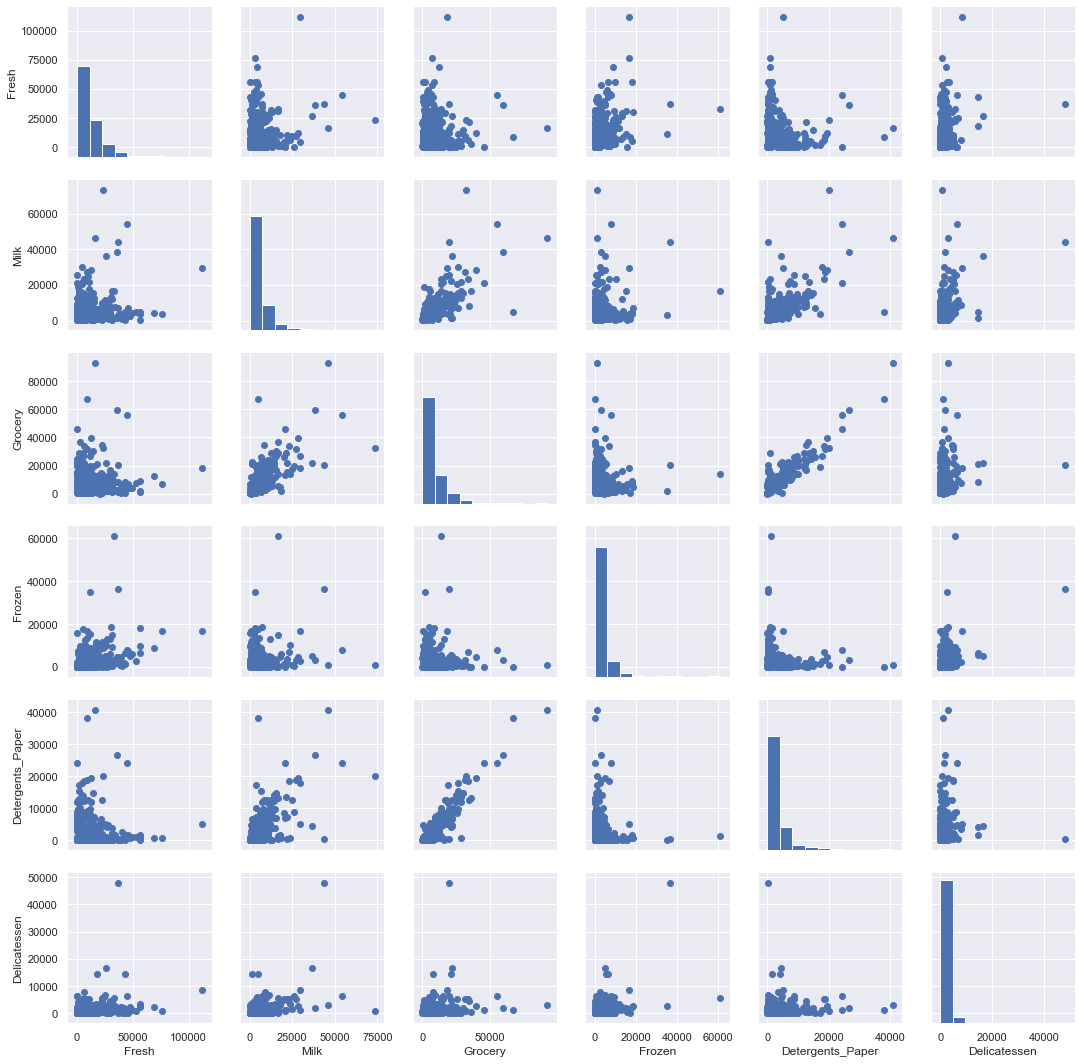

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

pairGrid = sns.PairGrid(data)
pairGrid.map_diag(plt.hist)
pairGrid.map_offdiag(plt.scatter);

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# Select three indices of your choice you wish to sample from the dataset
indices = [123, 234, 300]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11170,10769,8814,2194,1976,143
1,15603,2703,3833,4260,325,2563
2,16448,6243,6360,824,2662,2005


Samples against Mean


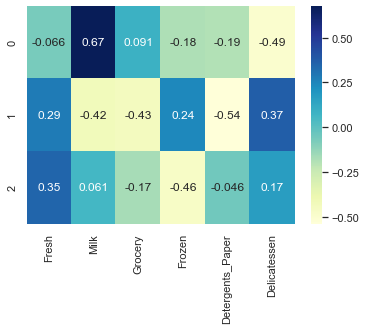

In [5]:
print ("Samples against Mean")
sns.heatmap((samples-np.around(data.mean().values))/data.std(ddof=0), annot=True, cmap="YlGnBu");

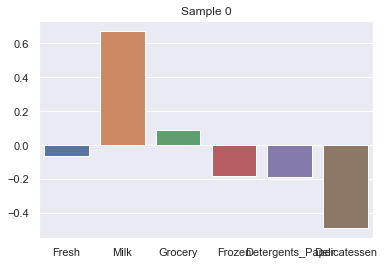

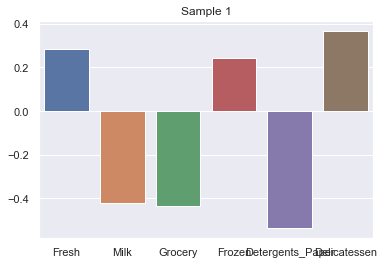

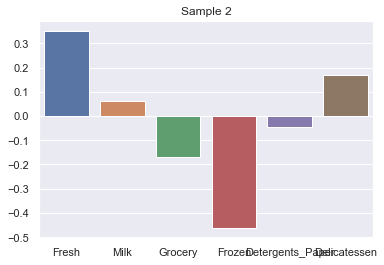

In [6]:
plt.figure()
plt.axes().set_title("Sample 0")
sns.barplot(x=samples.columns.values,y=(samples.iloc[0].values-data.mean().values)/data.std(ddof=0));

plt.figure()
plt.axes().set_title("Sample 1")
sns.barplot(x=samples.columns.values,y=(samples.iloc[1].values-data.mean().values)/data.std(ddof=0));

plt.figure()
plt.axes().set_title("Sample 2")
sns.barplot(x=samples.columns.values,y=(samples.iloc[2].values-data.mean().values)/data.std(ddof=0));

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

- **Sample 0:** Milk is used in large m.u. and Grocery is used in above average m.u. above mean, hence it is possible that this establishment could be a Small sized Grocery Market.
- **Sample 1:** Fresh, Frozen and Delicatessen are used in large m.u above mean, hence it is possible that this establishment could be a Cafe Restaurant.
- **Sample 2:** Fresh, Milk and Delicatessen are used in large m.u above mean, hence it is possible that this establishment could be a Restaurant or a Super Market

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import fbeta_score

def calculateScore(feature):
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(columns=feature)
    dropped_feature = data[[feature]]

    # Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, dropped_feature, test_size=0.25, random_state=64)

    # Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=64)
    regressor.fit(X_train, y_train)

    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print ("Decision Tree Regressor Score for {}: {}".format(feature, score))
    return score

score_list = []
for feature in data.columns:
    score = calculateScore(feature)
    score_list.append(score)

Decision Tree Regressor Score for Fresh: -1.1099889296944516
Decision Tree Regressor Score for Milk: 0.2153390928357355
Decision Tree Regressor Score for Grocery: 0.5635453011108963
Decision Tree Regressor Score for Frozen: -0.10233771892393562
Decision Tree Regressor Score for Detergents_Paper: 0.7732460603559203
Decision Tree Regressor Score for Delicatessen: 0.14504502580997924


Text(0, 0.5, 'R^2 Score')

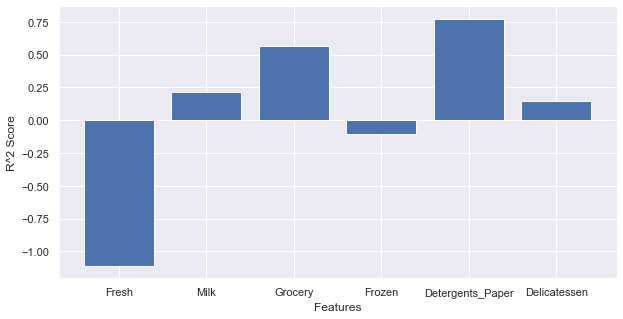

In [8]:
f, axes = plt.subplots(1, figsize=(10, 5))
axes.bar(data.columns, score_list);
axes.set_xlabel("Features")
axes.set_ylabel("R^2 Score")

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Answer:**

I calculated the `R^2 Score` for all the features present in the dataset and following are my observations:

- **Fresh**:
    - Prediction Score is -1.1099
    - It is a negative score, the correlation of this feature with the other features is very less.
    - Leaving out this feature will in-correctly identify the Customer Segment as it has a High Level of Information Stored within.

- **Frozen**:
    - Prediction Score is -0.102
    - It is a negative score, the correlation of this feature with the other features is less but this feature correlates better than that of Fresh's.
    - Leaving out this feature will in-correctly identify the Customer Segment as it has a High Level of Information Stored within but it compares lesser than that of Fresh's.

- **Delicatessen**:
    - Prediction Score is 0.145
    - It is a positive score, the correlation of this feature with the other features is better than that of Frozen's.
    - Leaving out this feature will in-correctly identify the Customer Segment as it has a High Level of Information Stored within but it compares lesser than that of Frozen's.

- **Milk**:
    - Prediction Score is 0.215
    - It is a positive score, the correlation of this feature with the other features is better than that of Delicatessen's.
    - It has a comparatively lower Information that that of Delicatessen.
    - Leaving out this feature will in-correctly identify the Customer Segment as it still has a High Level of Information Stored within.

- **Grocery**:
    - Prediction Score is 0.563
    - It is a positive score, the correlation of this feature with the other features is better than that of Milk's.
    - This feature has comparatively lesser Information Gain than that of Milk's.
    - The score is 0.563 which is an average score, but still it posessess a good level of Information to predict the Customer Segment.

- **Detergent Papers**:
    - Prediction Score is 0.773
    - It is a positive score, the correlation of this feature with the other features is better than that of Grocery's.
    - This has very lesser Information Gain, but not level of 0, if the score would have been 0.9 - 1.0 then this feature could have been removed from the dataset, to improve the performance if that would have been the requirement.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

_**PairGrid had a better view than Scatter Matrix.**_

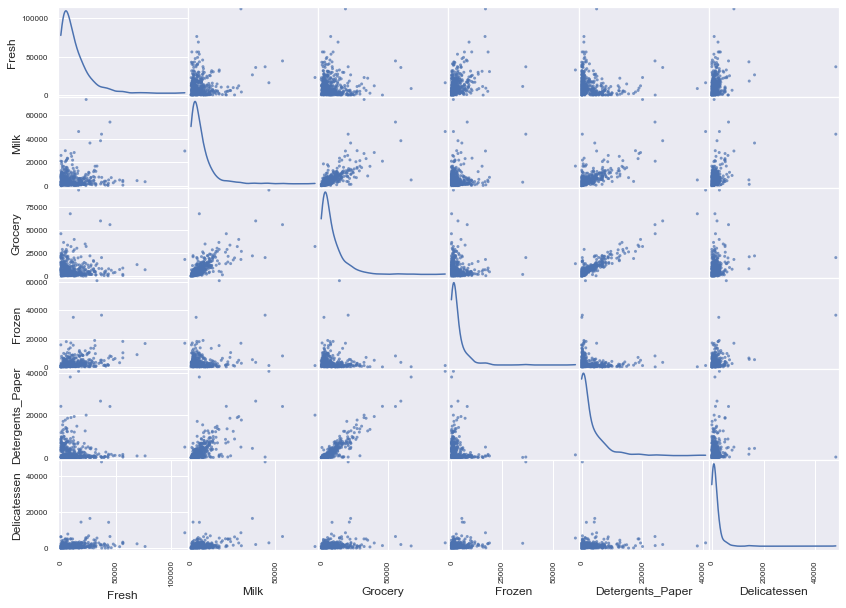

In [9]:
from pandas.plotting import scatter_matrix

# Produce a scatter matrix for each pair of features in the data
scatter_matrix(data, alpha = 0.7, figsize = (14,10), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

Following are my observation from the Scatter Matrix plotted above:

- `Fresh` doesn't have any good correlation with any of the Features as the items are evenly placed in the 2D Graph
- `Milk` has a good correlation with `Grocery` and `Detergent Paper`, as there can be observed that with an increase in `Milk` m.u. there is an equal increase in `Grocery` & `Detergent Paper`
- `Frozen` also doesn't have a good correlation with any of the other Features
- `Delicatessen` also doesn't have a good correlation with any of the other Features

The Scatter Matrix in here and the Decision Tree Regressor Score above proves the correlation. The top 3 scorers were the `Detergent Papers`, `Milk` and `Groceris`, and the same has been proved by the Scatter Matrix as well as Pair Grid Above.

There are certain outliers as well in the dataset which should be removed if they are outliers in more than 1 features.

Let's try to draw a Heatmap to understand the correlation with a better visualization.

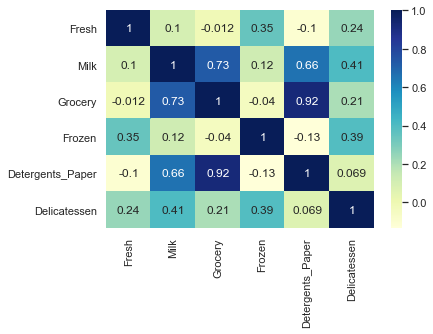

In [10]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu");

The Heatmap sums up the observation made above with the Decision Tree Regressor Score and the Scater Matrix.
`Detergent Papers`, `Milk` & `Grocery` have a good correlation score.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

The Distribution above shows a bit clearly that the data is distributed un-evenly hence the Clustering logic might not be so good, hence we need to do Feature Scaling so that all the Feature gets scaled to a common value.

The Scatter Plot above also shows the same.

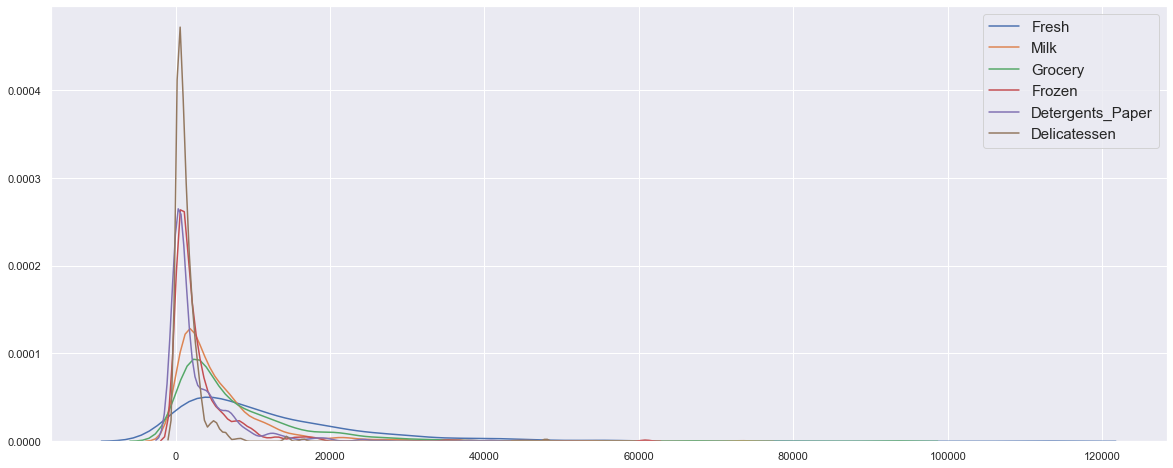

In [11]:
plt.figure(figsize = (20,8))

for cols in data.columns.values:
    ax = sns.kdeplot(data[cols])
    ax.legend(loc=0, prop={'size': 15})

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

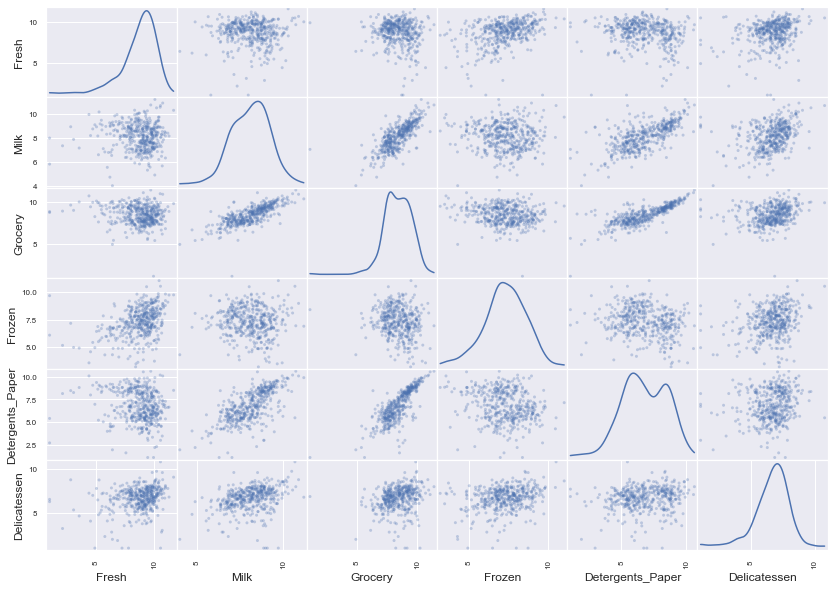

In [12]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
scatter_matrix(log_data, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

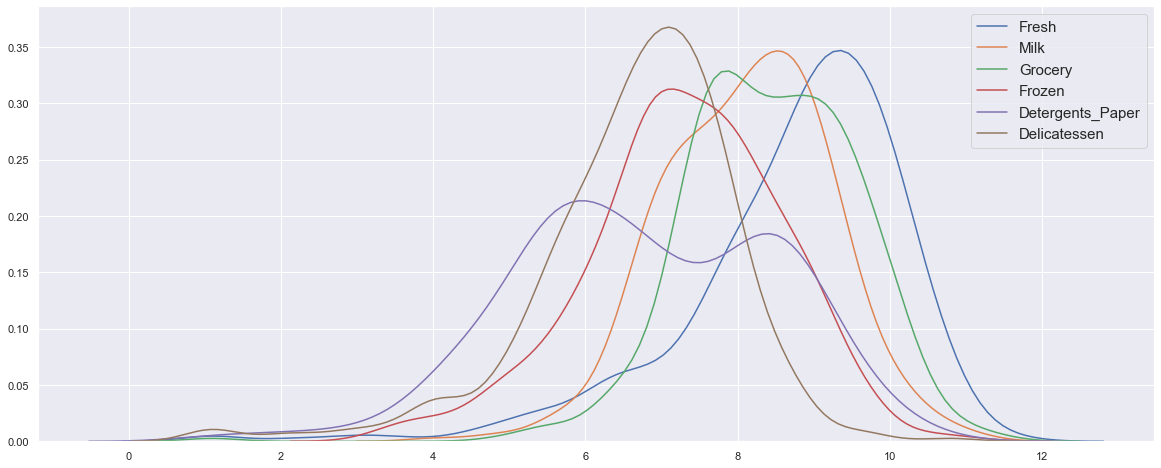

In [13]:
plt.figure(figsize = (20,8))

for cols in log_data.columns.values:
    ax = sns.kdeplot(log_data[cols])
    ax.legend(loc=0, prop={'size': 15})

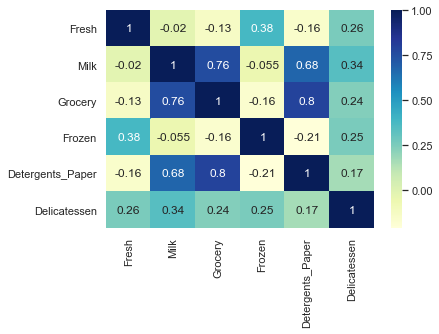

In [14]:
sns.heatmap(log_data.corr(), annot=True, cmap="YlGnBu");

The above distribution after the Feature Scaling proves that the Features are now properly scaled.

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [15]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.320987,9.284427,9.084097,7.693482,7.588830,4.962845
1,9.655218,7.902118,8.251403,8.357024,5.783825,7.848934
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


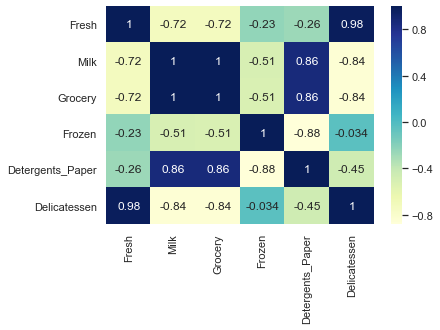

In [16]:
sns.heatmap(log_samples.corr(), annot=True, cmap="YlGnBu");

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [17]:
# Select the indices for data points you wish to remove
all_outliers  = []
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    current_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(current_outliers)
    
    all_outliers += current_outliers.index.tolist()

outlier_dict = {}
for outlier in all_outliers:
    count = outlier_dict.get(outlier)
    if count == None:
        count = 0
    outlier_dict[outlier] = count + 1

for outlier, count in outlier_dict.items():
    if count > 1:
        outliers.append(outlier)

print ("Total number of outlier which are outlier in at-least one dataset is {}".format(len(outlier_dict)))
print ("Removed the following indices: {}\n{}".format(len(outliers), outliers))
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Total number of outlier which are outlier in at-least one dataset is 42
Removed the following indices: 5
[65, 66, 128, 154, 75]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

- There are in total `5` outliers.
- These outliers should be removed, since these indices are in more than 2 Features then considering them in the Clustering Algorithm would lead to skewing defects.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

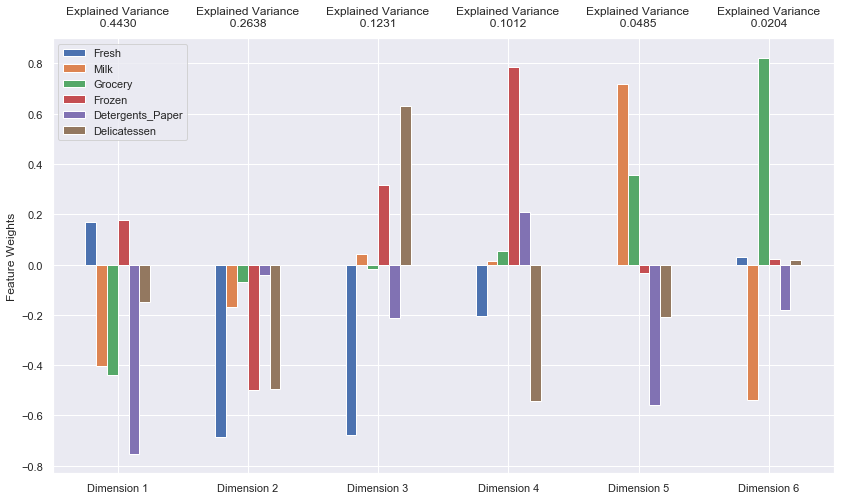

In [18]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.columns), random_state=64).fit(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

- Total Variance in the data explained by the first and second principal component is (0.4430 + 0.2638) = 0.7068. i.e. 70.68% of data is covered by the first 2 components
- Total Variance in the data explained by the first four principal component is (0.44302505 + 0.26379218 + 0.1230638 +  0.10120908) = 0.9311. i.e. 93% of data is covered by the first 4 components.
- Components Description:
    - **PC1:** This dimension depends large on the negative correlation of the Detergent Paper, Grocery & Milk. This spending habit could be of a Grocery Store.
    - **PC2:** This dimension depends large on the negative correlation of Fresh, Frozen and Delicatessen. This spending habit could be of a Cafe.
    - **PC3:** This dimension depends large on the negative correlation of Fresh and the positive correlation of the Frozen and Delicatessen. This spending habit could be of a Cafe too but they switch between Fresh and Frozen-Delicatessen items.
    - **PC4:** This dimension depends large on the negative correlation of Delicatessen and Fresh, and the positive correlation of the Frozen and Detergent Paper. This spending habit could be of a Restaurant.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [19]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.9128,0.0198,-1.4805,1.3307,0.9609,-0.2671
1,1.1049,-1.6011,0.6590,-0.2241,0.0517,0.2059
2,-1.2804,-0.9587,-0.4701,-0.9124,-0.2345,-0.2514


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

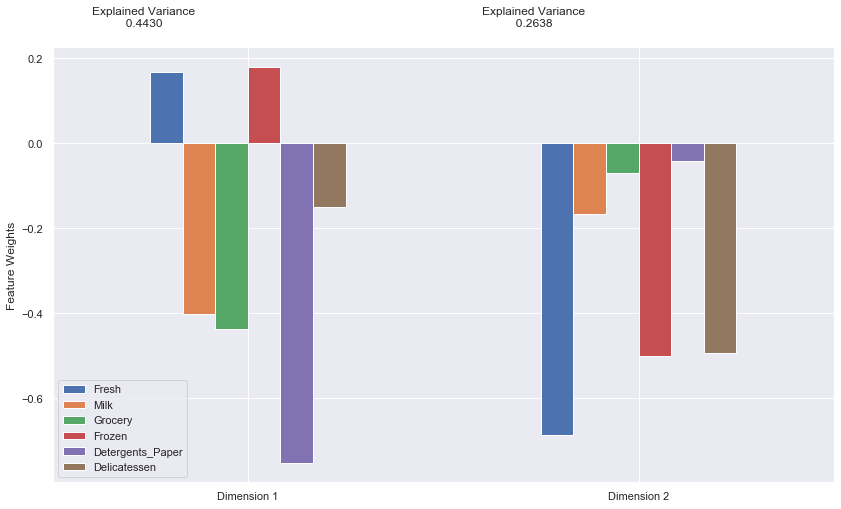

In [20]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=64).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

pca_results = vs.pca_results(good_data, pca)

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [21]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.9128,0.0198
1,1.1049,-1.6011
2,-1.2804,-0.9587


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

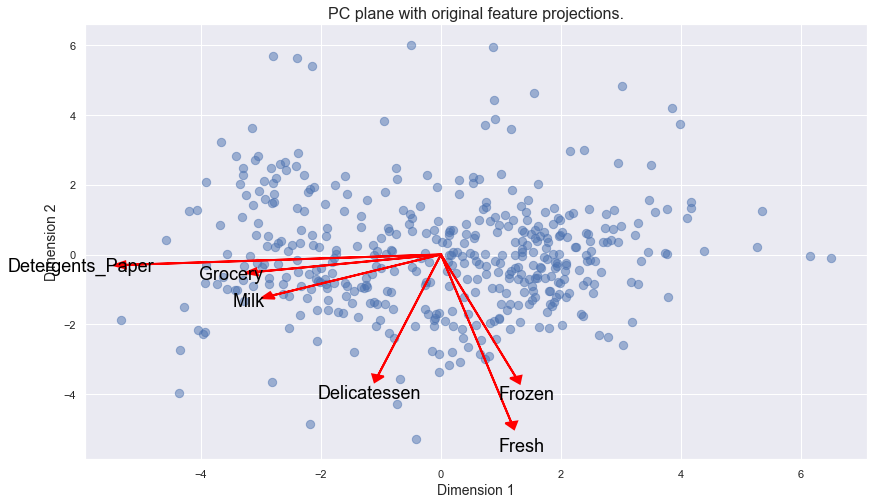

In [22]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

**Advantages of K-Means Clustering Algorithm**:
- Relatively simple to implement.
- Scales to large data sets.
- Guarantees convergence.
- Can warm-start the positions of centroids.
- Easily adapts to new examples.
- Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

**Advantages of Gaussian Mixture Model Clustering Algorithm**:
- It is the fastest algorithm for learning mixture models
- As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.

**Which Algortithm to go for**
- As it can be observed from the ScatterMatrix the data is not clustered, they seem to be quite evenly distributed. Hence `Gaussian Misture Model` would be the best option to go for.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def scoreKMeans(n_clusters):
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters, random_state=64).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.cluster_centers_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    return score

n_clusters_list = np.arange(2, 20)
score_list = []
for n_clusters in n_clusters_list:
    score_list.append(scoreKMeans(n_clusters))

result = pd.DataFrame(score_list, n_clusters_list, columns=['Silhouette Score'])
result.columns.name = 'Number of Clusters'
display(result)

Number of Clusters,Silhouette Score
2,0.426281
3,0.396891
4,0.331548
5,0.346677
6,0.361038
7,0.357201
8,0.364055
9,0.358685
10,0.367047
11,0.353177


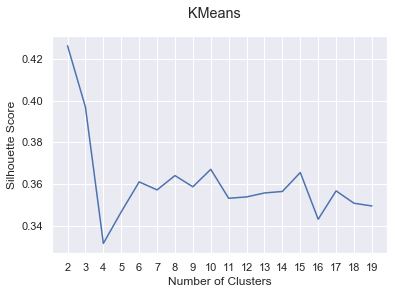

In [24]:
import matplotlib.pyplot as plt
plt.plot(n_clusters_list, score_list)
plt.suptitle('KMeans')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(n_clusters_list)
plt.show();

In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def scoreGaussianMixture(n_components):
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_components, random_state=64).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    return score

n_components_list = np.arange(2, 20)
score_list = []
for n_components in n_components_list:
    score_list.append(scoreGaussianMixture(n_components))

result = pd.DataFrame(score_list, n_components_list, columns=['Silhouette Score'])
result.columns.name = 'Number of Components'
display(result)

Number of Components,Silhouette Score
2,0.421917
3,0.375532
4,0.293270
5,0.242442
6,0.301031
7,0.291871
8,0.296099
9,0.309407
10,0.259752
11,0.318206


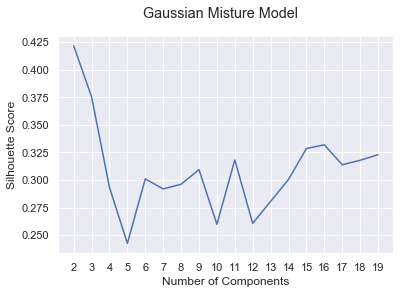

In [26]:
import matplotlib.pyplot as plt
plt.plot(n_components_list, score_list)
plt.suptitle('Gaussian Misture Model')
plt.xlabel("Number of Components")
plt.ylabel("Silhouette Score")
plt.xticks(n_components_list)
plt.show();

Though the KMeans at cluster count 2 is giving higher Silhouette Score than Gaussian Mixture Model, we will be going with Gaussian Mixture Model because of its advantages. Gaussian Mixture Model works better than KMeans if the data is evenly distributed in the space and is faster than the KMeans.


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
The Plot above shows the Graph between Number of Clusters and the Silhouette Score. If the number of clusters is mentioned as `2` then the Silhouette Score is 0.42 which is the maximum.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [27]:
# Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2, random_state=64).fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

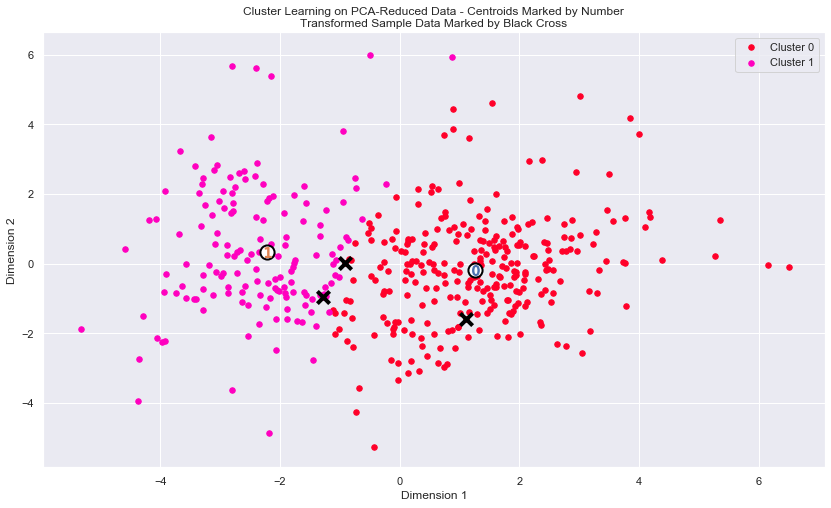

In [28]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [29]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


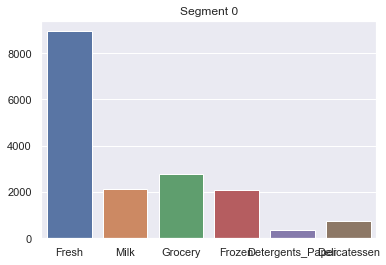

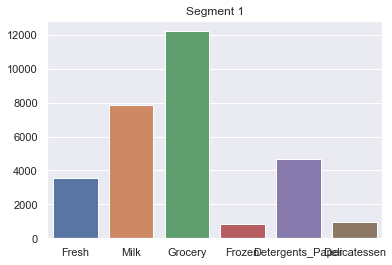

In [30]:
plt.figure()
plt.axes().set_title("Segment 0")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values);

plt.figure()
plt.axes().set_title("Segment 1")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values);

Let's also compare these Segments with respect to the Mean Values of each those Features to make a better understanding.

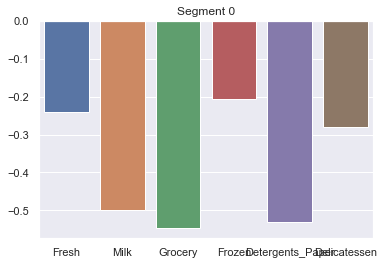

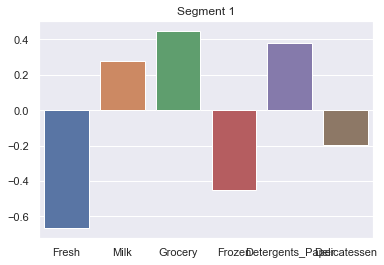

In [31]:
plt.figure()
plt.axes().set_title("Segment 0")
sns.barplot(x=true_centers.columns.values,y=(true_centers.iloc[0].values-data.mean().values)/data.std(ddof=0));

plt.figure()
plt.axes().set_title("Segment 1")
sns.barplot(x=true_centers.columns.values,y=(true_centers.iloc[1].values-data.mean().values)/data.std(ddof=0));

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

- **Segment 0**: The Establishments in this Segment are below the Mean values of each features but they still spend a lot in Fresh, Grocery and Milk & Frozen have almost same values. It seems to be a Small Sized Cafe or may be a Restaurant.
- **Segment 1**: The Establishments in this Segment spend a lot in Grocery, Milk & Detergent Papers. It seems they are a Super Market or Grocery Store.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [32]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


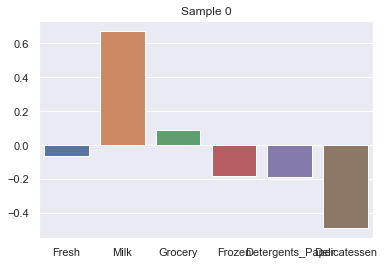

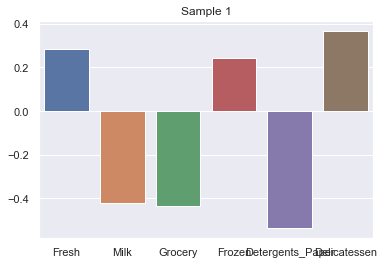

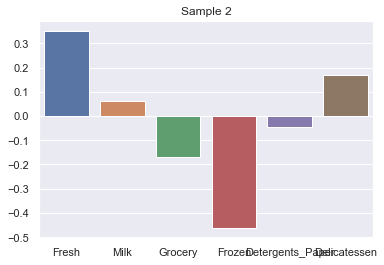

In [33]:
plt.figure()
plt.axes().set_title("Sample 0")
sns.barplot(x=samples.columns.values,y=(samples.iloc[0].values-data.mean().values)/data.std(ddof=0));

plt.figure()
plt.axes().set_title("Sample 1")
sns.barplot(x=samples.columns.values,y=(samples.iloc[1].values-data.mean().values)/data.std(ddof=0));

plt.figure()
plt.axes().set_title("Sample 2")
sns.barplot(x=samples.columns.values,y=(samples.iloc[2].values-data.mean().values)/data.std(ddof=0));

**Answer:**
- **Sample 0** is predicted to be of **Segment 0**, i.e. this Sample is predicted to be a cafe/Restaurant. The prediction is somewhere near the border. As the assumption made above was Grocery Market.
- **Sample 1** is predicted to be of **Segment 0**, i.e. this Sample is predicted to be a Cafe/Restaurant. It was not rightly assumed as Cafe/Restaurant earlier.
- **Sample 2** is predicted to be of **Segment 1**, i.e. this Sample is predicted to be a Super Market / Grocery Store. This establishment was assumed to be a Restaurant / Super Market

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

As per the analysis above, it is observed that Customer Segment 0 requires a lot of Frozen, Fresh and Delicatessen, where-as the Customer Segment 1 requires a lot of Grocery, Detergent paper and Milk. From this particular data it is actually kind of understandable that the Establishments in the Customer Segment 1 would react Negatively to the 3 days Delivery Scheme while the ones in the Customer Segment 0 would react Positively.

In order to find the right response, `A/B Testing Methodology` could be employed. We can use a sample set of significant Establishments from both Customer Segments (Test Group) and simply apply the 3 days Delivery Scheme to only those significant Establishments (Variation), after serving them this variation for a month or so, we can understand their feedback by calling them directly and compare the response against the remainder of the Establishments in each Cluster (Control Group). This would help the Distributor understand how this change in Delivery Scheme for the Test Group has affected the Customer Segment after all, and thereby adapt the change accordingly for that particular Customer Segment which showed Positive results.

In General, the Test Group would be provided with a variation and the Control Group remains with the same, after some time of testing, the statistics are recorded and compared between the test and control group. Finally the Test set in a Customer Segment which depicted good statistics would be adopted for the that particular Customer Segment and the one that showed negative results would be continued with the old one. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
Following are the things to be considered:
- Firstly with the dataset we need to run Clustering Algorithm and understand the Segments/Clusters these establishments belong.
- These Segments/Clusters constitutes a new Feature.
- Now Supervised Algorithm such as Decision Tree Regressor, Boosting Algorithm could be used to predict the Customer Segments (Target/Dependent Variable) with the Estimated Annual Spending being the Independent Variable.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

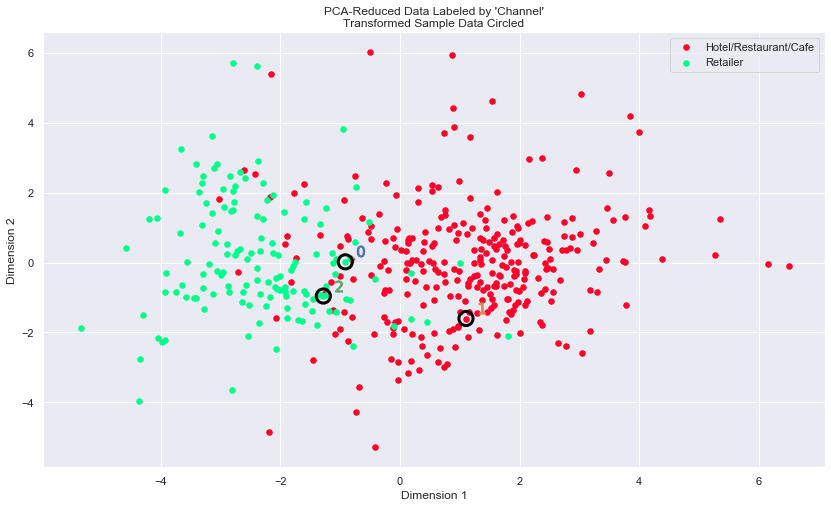

In [34]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
- As per the Diagram above, the Sample 0 and 2 belong to the Retailer and Sample 1 belong to the Hote/Restaurant/Cafe. The Assumptions and predictions made were correct for Sample 1 and Sample 2 which is a good Score in general. Since the chosen Samples come very close to the separation line, the predictions will be always be 50-50 here or there.
- The Establishments in the far left and far right would be considered as Retailers and Hote/Restaurant/Cafe respectively. But yes there will be few errors, no algorithm can be 100% right.
- Yes, these classifications are consistent with my previous definitions of the Customer Segments.